## Question 1 (`Needs Higher Attention`):
You are given the following text:

`OpenAI, founded in December 2015, is a research laboratory that develops artificial intelligence technologies. The company is headquartered in San Francisco, California, and has received funding from leading organizations such as Microsoft. GPT models, created by OpenAI, are widely used in natural language processing applications. Elon Musk, one of the co-founders, left OpenAI in 2018 due to potential conflicts of interest with Tesla. OpenAI's mission is to ensure that artificial general intelligence benefits all of humanity.`

Write a python code to perform the following tasks:

1. Extract and display all named entities and their labels (e.g., PERSONS, ORGANIZATIONS, LOCATIONS).
2. Perform POS tagging and display the word and its corresponding POS tag.

## Solution for question 1:

In [ ]:
import spacy

# Step 1: Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Step 2: Input text
text = """
OpenAI, founded in December 2015, is a research laboratory that develops artificial intelligence technologies.
The company is headquartered in San Francisco, California, and has received funding from leading organizations such as Microsoft.
GPT models, created by OpenAI, are widely used in natural language processing applications.
Elon Musk, one of the co-founders, left OpenAI in 2018 due to potential conflicts of interest with Tesla.
OpenAI's mission is to ensure that artificial general intelligence benefits all of humanity.
"""

# Step 3: Process the text
doc = nlp(text)

# Task 1: Named Entity Recognition (NER)
print("Named Entities:")
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

# Task 2: Part-of-Speech (POS) Tagging
print("\nPOS Tagging:")
for token in doc:
    print(f"{token.text} - {token.pos_}")


Named Entities:
OpenAI - GPE
December 2015 - DATE
San Francisco - GPE
California - GPE
Microsoft - ORG
GPT - ORG
OpenAI - GPE
Elon Musk - PERSON
one - CARDINAL
OpenAI - GPE
2018 - DATE
Tesla - ORG
OpenAI - GPE

POS Tagging:

 - SPACE
OpenAI - PROPN
, - PUNCT
founded - VERB
in - ADP
December - PROPN
2015 - NUM
, - PUNCT
is - AUX
a - DET
research - NOUN
laboratory - NOUN
that - PRON
develops - VERB
artificial - ADJ
intelligence - NOUN
technologies - NOUN
. - PUNCT

 - SPACE
The - DET
company - NOUN
is - AUX
headquartered - VERB
in - ADP
San - PROPN
Francisco - PROPN
, - PUNCT
California - PROPN
, - PUNCT
and - CCONJ
has - AUX
received - VERB
funding - NOUN
from - ADP
leading - VERB
organizations - NOUN
such - ADJ
as - ADP
Microsoft - PROPN
. - PUNCT

 - SPACE
GPT - PROPN
models - NOUN
, - PUNCT
created - VERB
by - ADP
OpenAI - PROPN
, - PUNCT
are - AUX
widely - ADV
used - VERB
in - ADP
natural - ADJ
language - NOUN
processing - NOUN
applications - NOUN
. - PUNCT

 - SPACE
Elon - PROPN
Mu

## Question 2:

You are given the following dataset:

In [ ]:
import pandas as pd

data = {
    "Age": [25, 30, 45, 35, 40, 50, 60, 22, 23, 27],
    "Annual Income": [50000, 60000, 120000, 75000, 90000, 150000, 200000, 45000, 48000, 52000] # in USD
}

df = pd.DataFrame(data)

df

,Age,Annual Income
0,25,50000
1,30,60000
2,45,120000
3,35,75000
4,40,90000
5,50,150000
6,60,200000
7,22,45000
8,23,48000
9,27,52000


`TASK: Write a Python code to cluster customers into groups based on their age and annual income using K-Means.`

## Solution for question 2:

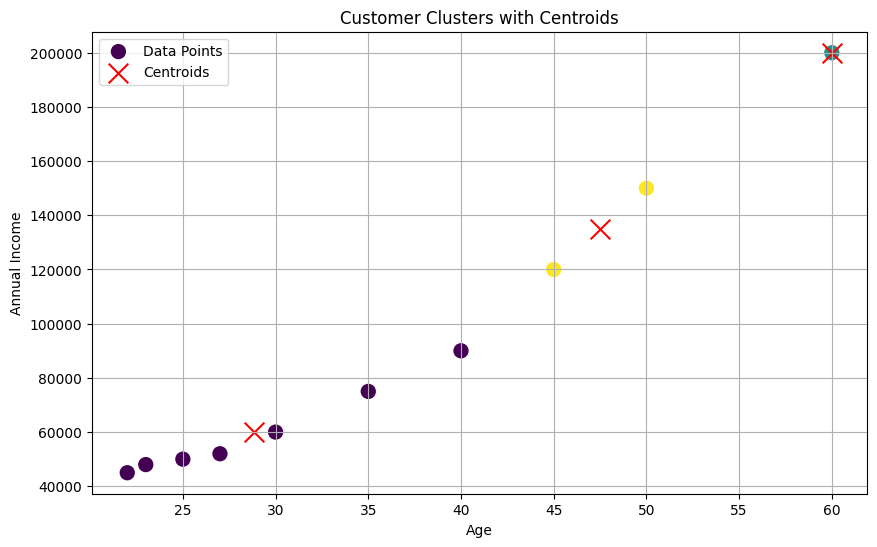

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df)

# Step 2: Extract cluster centers
cluster_centers = kmeans.cluster_centers_

# Step 3: Visualize clusters and centroids
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(df["Age"], df["Annual Income"], c=df["Cluster"], cmap="viridis", s=100, label="Data Points")

# Plot cluster centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c="red", marker="x", s=200, label="Centroids")

# Finalize the plot
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Customer Clusters with Centroids")
plt.legend()
plt.grid(True)
plt.show()



## Question 3 (`Needs Higher Attention`):

You are given the following the dataset:

In [ ]:
import numpy as np

data = np.array([
    [1500, 3, 1, 300000],  # Area (sq ft), Bedrooms, Location (1 = City, 0 = Suburb), Price
    [2000, 4, 1, 500000],
    [850, 2, 0, 150000],
    [1200, 3, 0, 200000],
    [1800, 3, 1, 450000],
    [1600, 3, 0, 350000],
    [1700, 4, 0, 400000]
])

# Convert data to pandas DataFrame
df = pd.DataFrame(data, columns=["Area (sq ft)", "Bedrooms", "Location", "Price"])

df

,Area (sq ft),Bedrooms,Location,Price
0,1500,3,1,300000
1,2000,4,1,500000
2,850,2,0,150000
3,1200,3,0,200000
4,1800,3,1,450000
5,1600,3,0,350000
6,1700,4,0,400000


Create a Neural Network using Keras to predict house prices based on features in the given dataset: `area, bedrooms, and location.`

`TASK:`
- Input features must be normalized.
- Train a model with one hidden layer of 64 neurons.
- Evaluate the model using Mean Squared Error (MSE).

## Solution for question 3:

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Specifying input features and target column:
X, y = data[:, :-1], data[:, -1]

# Step 1: Normalize input features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = y / 1000000  # Normalize target to millions

# Step 2: Split data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(1)  # Single output for price prediction
])

# Step 4: Compile and train the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, batch_size=2, verbose=1)

# Step 5: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae:.2f} million USD.")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3477 - mae: 0.5317  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4054 - mae: 0.5834 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2892 - mae: 0.4620 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2481 - mae: 0.4297
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2248 - mae: 0.4085
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2147 - mae: 0.3967
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1928 - mae: 0.3754 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1208 - mae: 0.2922 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1516 - mae: 0.3449 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1298 - mae: 0.3074 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1192 - mae: 0.3038 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1391 - mae: 0.3369 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

## Question 4:

`Problem:`

Create a simple `feedforward neural network` using Keras to classify the MNIST dataset (handwritten digits).

1. Use a hidden layer with 128 neurons and ReLU activation.
2. Use softmax activation for the output layer.
3. Train the model and evaluate its accuracy.

## Solution for question 4:

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Step 1: Load and preprocess the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0  # Normalize to range [0, 1]
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)

# Step 2: Build the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8638 - loss: 0.4733 - val_accuracy: 0.9538 - val_loss: 0.1563
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9600 - loss: 0.1372 - val_accuracy: 0.9661 - val_loss: 0.1149
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9715 - loss: 0.0927 - val_accuracy: 0.9706 - val_loss: 0.1010
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9817 - loss: 0.0651 - val_accuracy: 0.9697 - val_loss: 0.1009
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9855 - loss: 0.0494 - val_accuracy: 0.9714 - val_loss: 0.1004
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9697 - loss: 0.0953
Test Accuracy: 0.97
